## Importing required modules

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os,json
from collections import defaultdict
from urllib.parse import urlparse
import tldextract



pd.set_option('display.max_columns', None)


In [2]:
df_1000 = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\1000_domains_standardised_dates.csv")
df_1000_dates = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\1000_domains_blocklist_addition_dates.csv") 
df_twobatch = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\domain_twobatch_standardised_dates.csv")
# df_twobatch = pd.read_csv(r"C:\Users\Jun Rong\Documents\GitHub\IMDA-Domain-IP-Enrichment\Flask_App\domain_twobatch_standardised_dates.csv")
  

In [3]:
# Removing empty columns

empty_cols = [col for col in df_1000.columns if df_1000[col].isnull().all()]
# Drop these columns from the dataframe
df_1000.drop(empty_cols,
        axis=1,
        inplace=True)

empty_cols = [col for col in df_twobatch.columns if df_twobatch[col].isnull().all()]
# Drop these columns from the dataframe
df_twobatch.drop(empty_cols,
        axis=1,
        inplace=True)


In [4]:
len(df_1000)

1000

In [5]:
df_1000.head()

,Unnamed: 0,_id,domain,x_days_ago,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location
0,0,645b9719e7ba0a6b3d02b04e,imbbk3238g.xyz,7,13-04-2023T16:04:14,0,10-05-2023T21:07:37,16-05-2023T08:04:25,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,0,0,0,86,0,0,0,46.320335,42.175526,1.277589,0.463321,0.963893,0.818352,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",11-04-2023T05:46:04,"['01-05-2023T23:38:51', '18-04-2023T06:32:59']",resources/whois/imbbk3238g.xyz_20230516_080421...,[],['23.225.126.53'],resources/dns/imbbk3238g.xyz_gethostbyname_ex_...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/imbbk3238g.xyz_nameservers_20230...,imvip66ry.xyz,imbbk3238g.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-04-22T13:15:55,2023-04-22T13:15:55,2.0,resources/cert/imbbk3238g.xyz_20230516_080423....,1.0,['imvip66ry.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,NaN,NaN,NaN
1,1,645b9719e7ba0a6b3d02b04f,imbbk323q.xyz,7,13-04-2023T16:03:25,0,10-05-2023T21:07:37,16-05-2023T08:05:58,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,0,0,0,86,0,0,0,46.685759,42.762724,1.176605,0.460202,0.855447,0.669554,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",11-04-2023T05:46:04,"['01-05-2023T23:38:51', '18-04-2023T06:32:42']",resources/whois/imbbk323q.xyz_20230516_080555....,[],['23.225.126.53'],resources/dns/imbbk323q.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/imbbk323q.xyz_nameservers_202305...,imvip66ry.xyz,imbbk323q.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-04-22T13:15:55,2023-04-22T13:15:55,2.0,resources/cert/imbbk323q.xyz_20230516_080556.6...,1.0,['imvip66ry.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,NaN,NaN,NaN
2,2,645b9719e7ba0a6b3d02b050,imgg6625p.xyz,7,25-04-2023T10:51:05,0,10-05-2023T21:07:37,16-05-2023T08:07:31,0,0,resources/upload_folder/23050801-LIST83-G1-MT2...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230516_080253.367.txt,64,0,1,22,0,0,0,46.356307,42.201133,1.606392,0.505926,1.297684,0.810074,DYNADOT LLC,REDACTED FOR PRIVACY,"['Dynadot Privacy Service', 'Super Privacy Ser...",19-04-2023T04:25:33,"['01-05-2023T23:40:29', '21-04-2023T02:26:35']",resources/whois/imgg6625p.xyz_20230516_080726....,[],['23.225.126.53'],resources/dns/imgg6625p.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/imgg6625p.xyz_nameservers_202305...,imvip66ry.xyz,imgg6625p.xyz,"C=

In [6]:
df_1000_dates.head()

,domain,blocklist_addition_date
0,imbbk3238g.xyz,24/4/2023 20:25
1,imbbk323q.xyz,24/4/2023 20:25
2,imgg6625p.xyz,24/4/2023 20:25
3,imgg6629p.xyz,24/4/2023 20:25
4,imgg6633p.xyz,24/4/2023 20:25


In [7]:
df_1000_dates.drop_duplicates(subset=['domain'],keep='first', inplace=True)
len(df_1000_dates)

859

In [8]:
## joining df
df_1000 = df_1000.join(df_1000_dates.set_index('domain'), on='domain', validate='m:1')

In [9]:
## stripping time from 8/3/2023 8:29
df_twobatch.blocklist_addition_date = df_twobatch.blocklist_addition_date.str.split(' ').str[0]
df_1000.blocklist_addition_date = df_1000.blocklist_addition_date.str.split(' ').str[0]

In [10]:
df_1000['blocklist_addition_date'].value_counts(dropna=False)

blocklist_addition_date
27/4/2023    313
5/5/2023     147
NaN          141
26/4/2023     57
28/4/2023     56
4/5/2023      50
2/5/2023      49
25/4/2023     44
29/4/2023     35
30/4/2023     35
1/5/2023      34
3/5/2023      25
24/4/2023     14
Name: count, dtype: int64

In [11]:
# Replacing all Nans with 6 May 
df_1000['blocklist_addition_date'] = df_1000['blocklist_addition_date'].fillna('5/5/2023')
df_1000['blocklist_addition_date'].value_counts(dropna=False)

blocklist_addition_date
27/4/2023    313
5/5/2023     288
26/4/2023     57
28/4/2023     56
4/5/2023      50
2/5/2023      49
25/4/2023     44
29/4/2023     35
30/4/2023     35
1/5/2023      34
3/5/2023      25
24/4/2023     14
Name: count, dtype: int64

In [12]:
## replacing timestamp slash with dash
df_twobatch['blocklist_addition_date'] = df_twobatch['blocklist_addition_date'].str.replace('/', '-')
df_1000['blocklist_addition_date'] = df_1000['blocklist_addition_date'].str.replace('/', '-')


In [13]:
## converting to timestamps
df_twobatch['blocklist_addition_date'] = pd.to_datetime(df_twobatch['blocklist_addition_date'], format = '%d-%m-%Y')
df_twobatch['processed_timestamp'] = pd.to_datetime(df_twobatch['processed_timestamp'], format = '%d-%m-%YT%H:%M:%S')
df_twobatch['cert_info.latest_cert'] = pd.to_datetime(df_twobatch['cert_info.latest_cert'], format = '%Y-%m-%dT%H:%M:%S')



df_1000['blocklist_addition_date'] = pd.to_datetime(df_1000['blocklist_addition_date'], format = '%d-%m-%Y')
df_1000['processed_timestamp'] = pd.to_datetime(df_1000['processed_timestamp'], format = '%d-%m-%YT%H:%M:%S')
df_1000['cert_info.latest_cert'] = pd.to_datetime(df_1000['cert_info.latest_cert'], format = '%Y-%m-%dT%H:%M:%S')




In [14]:
mask = (df_twobatch['blocklist_addition_date'] >= '2023-03-08') & (df_twobatch['blocklist_addition_date'] <= '2023-03-12')
df1 = df_twobatch[mask]

mask = (df_twobatch['blocklist_addition_date'] >= '2023-04-08') & (df_twobatch['blocklist_addition_date'] <= '2023-04-12')
df2 = df_twobatch[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-04-24') & (df_1000['blocklist_addition_date'] <= '2023-04-30')
df3 = df_1000[mask]

mask = (df_1000['blocklist_addition_date'] >= '2023-05-01') & (df_1000['blocklist_addition_date'] <= '2023-05-07')
df4 = df_1000[mask]

df1=df1.reset_index(drop=True)
df2=df2.reset_index(drop=True)
df3=df3.reset_index(drop=True)
df4=df4.reset_index(drop=True)

In [15]:
df2

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location
0,229,645da76f7b4cbcb7ca236734,singpass.gonapp.net,2023-04-08,7,NaN,08-04-2023T07:43:56,0,12-05-2023T10:41:51,2023-05-15 20:54:39,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,0,0,0,86,0,0,0,1.232987,12.580231,2.471848,0.545259,0.682265,0.763067,1.003524,"GoDaddy.com, LLC",Registration Private,"Domains By Proxy, LLC","['04-02-2017T02:15:01', '03-02-2017T21:15:01']","['04-02-2023T04:34:36', '03-02-2023T23:34:34']",resources/whois/singpass.gonapp.net_20230515_2...,[],['103.74.122.236'],resources/dns/singpass.gonapp.net_gethostbynam...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,230,645da76f7b4cbcb7ca236735,fy86vip99.xyz,2023-04-08,7,NaN,03-04-2023T14:40:33,0,12-05-2023T10:41:51,2023-05-15 20:55:30,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_181749.956.txt,65,0,1,21,0,0,0,1.651077,7.983360,1.692813,1.261294,0.461075,38.784660,0.860322,DYNADOT LLC,REDACTED FOR PRIVACY,Super Privacy Service LTD c/o Dynadot,05-03-2023T10:54:49,"['26-04-2023T20:07:16', '24-03-2023T10:08:25']",resources/whois/fy86vip99.xyz_20230515_205449....,[],['192.151.197.75'],resources/dns/fy86vip99.xyz_gethostbyname_ex_2...,"['ns1.dyna-ns.net.', 'ns2.dyna-ns.net.']",resources/dns/fy86vip99.xyz_nameservers_202305...,fy86vip18.xyz,fy86vip99.xyz,"C=US, O=Let's Encrypt, CN=R3",2023-03-24T09:13:06,2023-03-24 09:13:06,2.0,resources/cert/fy86vip99.xyz_20230515_205451.1...,1.0,['fy86vip18.xyz'],1.0,"[""C=US, O=Let's Encrypt, CN=R3""]",1.0,1.0,1.0,https://web.archive.org/web/20230330002222/htt...,30-03-2023T00:22:22,resources/archived_page/fy86vip99.xyz_20230515...
2,231,645da76f7b4cbcb7ca236736,lazada-ph.com,2023-04-08,7,NaN,23-04-2023T11:13:30,0,12-05-2023T10:41:51,2023-05-15 20:55:38,0,0,resources/upload_folder/8_to_12_apr_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_181749.956.txt,60,6,0,21,0,0,0,1.075234,3.906073,0.644524,0.808393,0.572856,0.766076,0.696836,Gname.com Pte. Ltd.,Redacted for privacy,Redacted for privacy,05-04-2023T09:02:39,"['05-05-2023T13:53:08', '05-05-2023T13:53:09']",resources/whois/lazada-ph.com_20230515_205535....,NaN,NaN,NaN,"['ns1.gname.net.', 'ns2.gname.net.']",resources/dns/lazada-ph.com_nameservers_202305...,*.lazada-ph.com,*.lazada-ph.com\nlazada-ph.com,"C=GB, ST=Greater Manchester, L=Salford, O=Sect...",2023-04-05T00:00:00,2015-02-15 00:00:

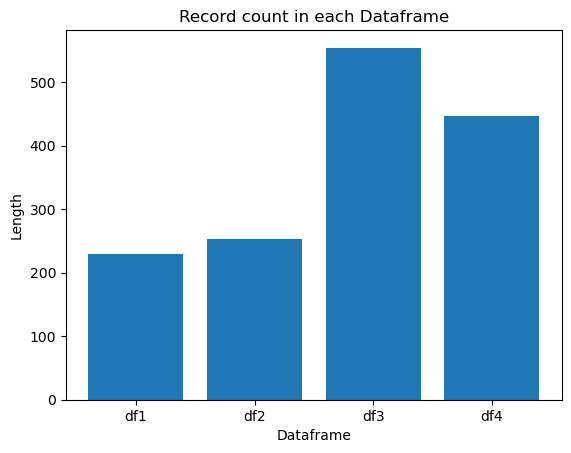

In [16]:
# Calculate the lengths of each dataframe
lengths = [len(df1), len(df2), len(df3), len(df4)]

# Create a bar plot
plt.bar(['df1', 'df2', 'df3', 'df4'], lengths)
plt.xlabel('Dataframe')
plt.ylabel('Length')
plt.title('Record count in each Dataframe')
plt.show()

In [17]:
df1

,Unnamed: 0,_id,domain,blocklist_addition_date,x_days_ago,to_skip,last_analysis_date,reputation,added_timestamp,processed_timestamp,failure_count,is_priority,source,has_screenshot,has_html,has_javascript,files_log,log_file,last_analysis_stats.harmless,last_analysis_stats.malicious,last_analysis_stats.suspicious,last_analysis_stats.undetected,last_analysis_stats.timeout,total_votes.harmless,total_votes.malicious,duration_log.vt_call,duration_log.screenshot,duration_log.grab_html_js,duration_log.get_whois_info,duration_log.get_dns_info,duration_log.get_cert_info,duration_log.get_archived_page_info,whois_info.registrar,whois_info.name,whois_info.org,whois_info.creation_date,whois_info.updated_date,whois_info.whois_file_location,dns_info.gethostbyname_ex.alias,dns_info.gethostbyname_ex.other_ip_address,dns_info.gethostbyname_ex.gethostbyname_ex_filepath,dns_info.dns_resolver_query.nameserver_list,dns_info.dns_resolver_query.nameservers_filepath,cert_info.common_name,cert_info.name_value,cert_info.issuer_name,cert_info.not_before,cert_info.latest_cert,cert_info.length_cert_json,cert_info.cert_file_location,cert_info.len(SubjectCN_set),cert_info.SubjectCN_set,cert_info.len(Issuer_set),cert_info.Issuer_set,cert_info.len(AltName_set),cert_info.AltName_count_min,cert_info.AltName_count_max,archived_page_info.newest.archive_url,archived_page_info.newest.timestamp,archived_page_info.archived_paged_file_location
0,0,645da74e7b4cbcb7ca236637,binance-sgd-club.pages.dev,2023-03-08,7,1.0,13-03-2023T12:06:03,0,12-05-2023T10:41:18,2023-05-15 17:54:50,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,1,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.919615,18.113396,14.513613,0.812515,0.125095,1.606780,0.767694,NaN,NaN,NaN,NaN,NaN,resources/whois/binance-sgd-club.pages.dev_202...,[],"['172.66.44.129', '172.66.47.127']",resources/dns/binance-sgd-club.pages.dev_getho...,"['lamar.ns.cloudflare.com.', 'mia.ns.cloudflar...",resources/dns/binance-sgd-club.pages.dev_names...,binance-sgd-club.pages.dev,*.binance-sgd-club.pages.dev\nbinance-sgd-club...,"C=US, O=Google Trust Services LLC, CN=GTS CA 1P5",2023-05-03T14:31:06,2023-03-05 10:03:21,4.0,resources/cert/binance-sgd-club.pages.dev_2023...,2.0,"['binance-sgd-club.pages.dev', '*.binance-sgd-...",2.0,"['C=GB, ST=Greater Manchester, L=Salford, O=Se...",1.0,2.0,2.0,https://web.archive.org/web/20230305110552/htt...,05-03-2023T11:05:52,resources/archived_page/binance-sgd-club.pages...
1,1,645da74e7b4cbcb7ca236638,caruopay-sg-point.firebaseapp.com,2023-03-08,7,1.0,25-04-2023T22:39:14,0,12-05-2023T10:41:18,2023-05-15 17:55:06,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,1,1,0,"[{'type': 'http_screenshot', 'stderr': ""Screen...",resources/logs/logfile_20230515_175414.382.txt,53,16,0,18,0,0,0,0.867291,11.861851,0.375059,0.044326,0.043300,1.659945,1.439980,NaN,NaN,NaN,NaN,NaN,NaN,[],['199.36.158.100'],resources/dns/caruopay-sg-point.firebaseapp.co...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,645da74e7b4cbcb7ca236639,laoergood.cn,2023-03-08,7,1.0,08-03-2023T09:08:35,0,12-05-2023T10:41:18,2023-05-15 17:55:20,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.txt,0,0,0,86,0,0,0,0.850947,7.506824,0.536389,0.394479,1.276218,2.749948,1.379163,腾讯云计算（北京）有限责任公司,李志宏,NaN,26-10-2022T09:11:09,NaN,resources/whois/laoergood.cn_20230515_175514.3...,NaN,NaN,NaN,"['marina.dnspod.net.', 'pansy.dnspod.net.']",resources/dns/laoergood.cn_nameservers_2023051...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,645da74e7b4cbcb7ca23663a,police088762sg.homes,2023-03-08,7,1.0,23-11-2022T17:44:35,0,12-05-2023T10:41:18,2023-05-15 17:55:32,0,0,resources/upload_folder/8_to_12_mar_20230512_1...,0,0,0,"[{'type': 'http_screenshot', 'stderr': 'Traceb...",resources/logs/logfile_20230515_175414.382.tx

## Jonathan's suggestion

### Different Subject CNs

In [94]:
## SHOW JONATHAN
## URL PARSER DOESNT WORK IF in scenarios with subdomain vs domain


# url = "//www.facebook.com/hello"
# url = "//reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true"
# url = "http://docs.python.org:80/3/library/urllib.parse.html?highlight=params#url-parsing"
# url = "//ad.simonshop.com"
url = "//app.simonshop.com"
# url = "//*.simonshop.com"
# url ="//facebook.com"
parsed_url = urlparse(url)
parsed_url
# parsed_url.hostname.split('.')[0]


ParseResult(scheme='', netloc='app.simonshop.com', path='', params='', query='', fragment='')

In [105]:
## Alternative: tldextract
# extract = tldextract.extract("reschedule-track.com/secureJsp.php?&URI=1a78e09b36dd9349af6a929c067e7a85&sessionid=58a7e760c929a6fa9439dd63b90e87a1&securessl=true")
url = '*.binance-sgd-club.pages.dev'
extract = tldextract.extract(url)
print(extract)
extract.domain
print("test:", url)

ExtractResult(subdomain='*.binance-sgd-club', domain='pages', suffix='dev')
test: *.binance-sgd-club.pages.dev


In [117]:
## what are Subject CNs? --> Subject Common Name: Information about the entity to which the certificate is issued.
## Why are we looking at it? 


def get_unique_domains(subjectCN_set):
    if isinstance(subjectCN_set, float):
        return False
    
    domain_set = set()
#     print(subjectCN_set)
    subjectCN_set = subjectCN_set.strip('][').split(', ')

    for subjectCN in subjectCN_set:
        subjectCN = subjectCN.replace("'",'')
        extract = tldextract.extract(subjectCN)
#         subdomain = extract.subdomain
        domain = extract.domain
#         print("domain:", domain)
#         suffix = extract.suffix
        domain_set.add(domain)
       
    ## we want if its equal 
    
    ## we want if its not 1
    if len(domain_set) > 1:
        return domain_set
    
    else:
        return False
            
        
df1['unique_domains'] = df1['cert_info.SubjectCN_set'].apply(get_unique_domains)
df2['unique_domains'] = df2['cert_info.SubjectCN_set'].apply(get_unique_domains)
df3['unique_domains'] = df3['cert_info.SubjectCN_set'].apply(get_unique_domains)
df4['unique_domains'] = df4['cert_info.SubjectCN_set'].apply(get_unique_domains)
# df1 [['cert_info.SubjectCN_set','unique_domains']]

In [118]:
df1 [['cert_info.SubjectCN_set','unique_domains']]

,cert_info.SubjectCN_set,unique_domains
0,"['binance-sgd-club.pages.dev', '*.binance-sgd-...",False
1,NaN,False
2,NaN,False
3,"['www.police088762sg.homes', 'cors.police08876...",False
4,"['*.usfsbk.com', 'online.unovb.com', 'secure.u...","{usfsbk, unovb}"
...,...,...
224,['wishsmall.shop'],False
225,"['lenzcapital.pro', '*.lenzcapital.pro']",False
226,['*.makeruuex.com'],False
227,NaN,False


### Latest cert > 3 months

In [24]:
# df = df1[df1['processed_timestamp'] <= df1['cert_info.latest_cert']]
# (df1['processed_timestamp'] > df1['cert_info.latest_cert']).value_counts()
result_df1 = df1[df1.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
print("total certs df1:", len(df1))
print("certs older than 3 months:", len(result_df1))

result_df2 = df2[df2.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
print("total certs df2:", len(df2))
print("certs older than 3 months:",len(result_df2))

result_df3 = df3[df3.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
print("total certs df3:", len(df3))
print("certs older than 3 months:",len(result_df3))

result_df4 = df4[df4.apply(lambda row: (row['processed_timestamp'] - row['cert_info.latest_cert']).days // 30 > 3, axis=1)]
print("total certs df4:", len(df4))
print("certs older than 3 months:",len(result_df4))

total certs df1: 229
certs older than 3 months: 38
total certs df2: 253
certs older than 3 months: 22
total certs df3: 554
certs older than 3 months: 25
total certs df4: 446
certs older than 3 months: 26


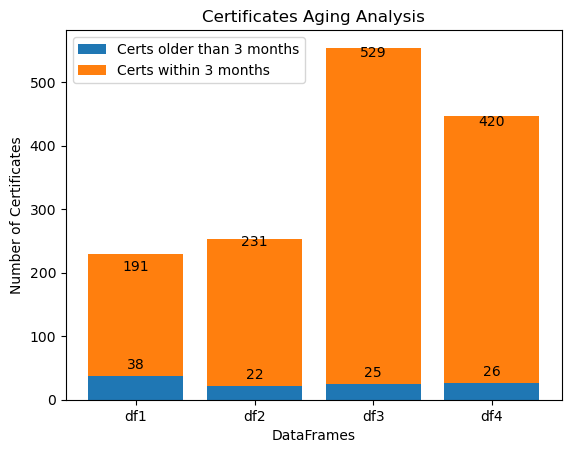

In [130]:
import matplotlib.pyplot as plt

# Define the data
total_certs = [len(df1), len(df2), len(df3), len(df4)]
certs_older_than_3_months = [len(result_df1), len(result_df2), len(result_df3), len(result_df4)]
labels = ['df1', 'df2', 'df3', 'df4']

# Plot the stacked bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(labels, certs_older_than_3_months, label='Certs older than 3 months')
bar2 = ax.bar(labels, [total - older_than_3_months for total, older_than_3_months in zip(total_certs, certs_older_than_3_months)],
              bottom=certs_older_than_3_months, label='Certs within 3 months')

# Add count labels on top of each bar
for rect in bar1 + bar2:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('Number of Certificates')
ax.set_title('Certificates Aging Analysis')

# Add legend
ax.legend()

# Show the plot
plt.show()


### VT malicious and Suspicious, Which engine is most "active"?

In [126]:
# df1[['last_analysis_stats.malicious','last_analysis_stats.suspicious']].value_counts()
counts = df1.groupby(['last_analysis_stats.malicious']).size()
counts

df1['last_analysis_stats.malicious'].describe()

count    229.000000
mean       5.751092
std        7.121998
min        0.000000
25%        0.000000
50%        1.000000
75%       12.000000
max       22.000000
Name: last_analysis_stats.malicious, dtype: float64

In [46]:
counts = df2.groupby(['last_analysis_stats.malicious']).size()
counts

last_analysis_stats.malicious
0     196
1      12
2       2
3       7
4       2
5       2
6       3
7       2
8       1
9       2
10      2
11      1
12      2
13      3
14      2
15      2
16      1
18      2
19      1
20      5
21      3
dtype: int64

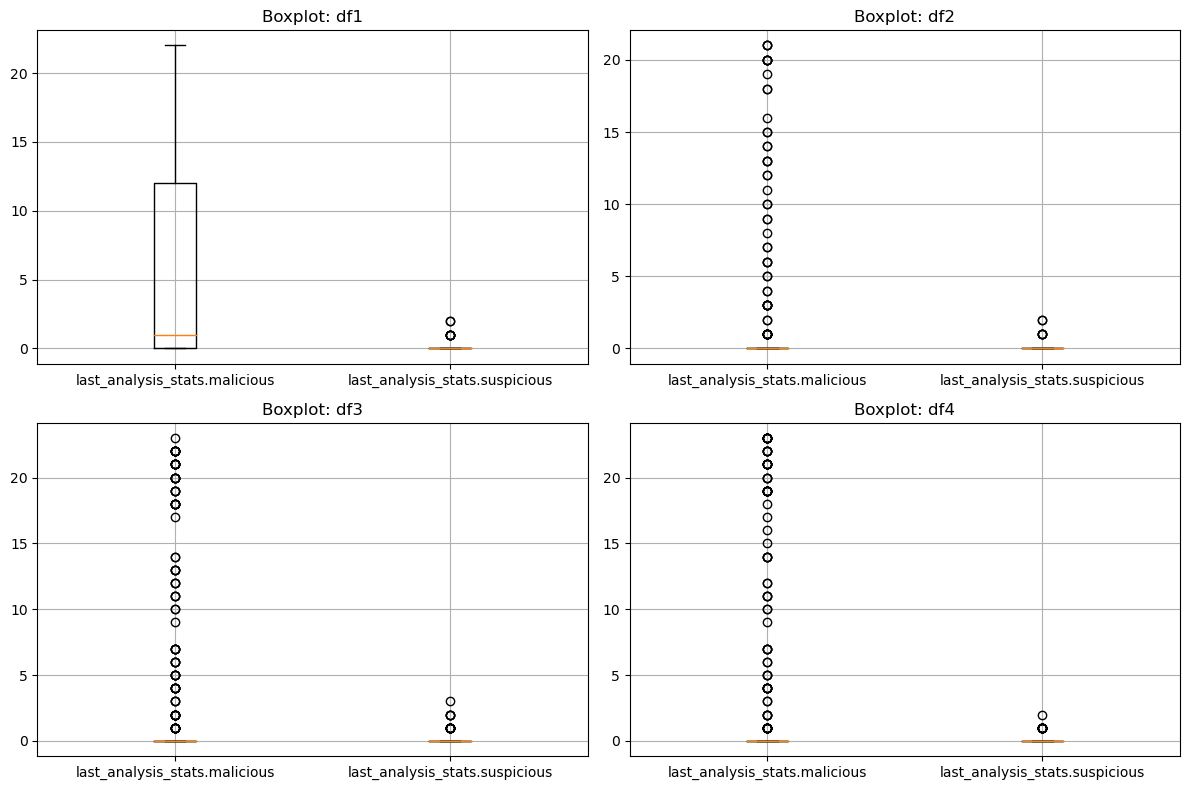

In [22]:
import matplotlib.pyplot as plt

# Extract the columns of interest from each dataframe
columns = ['last_analysis_stats.malicious', 'last_analysis_stats.suspicious']
data1 = df1[columns]
data2 = df2[columns]
data3 = df3[columns]
data4 = df4[columns]

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the boxplots in the subplots
axes[0, 0].boxplot(data1.values)
axes[0, 0].set_xticklabels(columns)
axes[0, 0].set_title('Boxplot: df1')

axes[0, 1].boxplot(data2.values)
axes[0, 1].set_xticklabels(columns)
axes[0, 1].set_title('Boxplot: df2')

axes[1, 0].boxplot(data3.values)
axes[1, 0].set_xticklabels(columns)
axes[1, 0].set_title('Boxplot: df3')

axes[1, 1].boxplot(data4.values)
axes[1, 1].set_xticklabels(columns)
axes[1, 1].set_title('Boxplot: df4')

# Add grid lines to each subplot
for ax in axes.flatten():
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### Infer --> Takes time for the VT engines to detect them as malicious, when is the optimal time to VT call then?

In [23]:
## dwelve into engine level 

## get list of json filenames in df
df_1000_domains = df_1000[['domain']] + ".json"
df_twobatch_domains = df_twobatch[['domain']] + ".json"
combined_list = df_1000_domains['domain'].tolist() + df_twobatch_domains['domain'].tolist()



## auto assign value:0 when key is given
engine_malicious_counts = defaultdict(int)
# engine_malicious_counts = {}

path_to_json_files = "downloaded_vtresponse"
# json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename.endswith('.json')]
json_file_names = [filename for filename in os.listdir(path_to_json_files) if filename in combined_list]


for json_file_name in json_file_names:
    with open(os.path.join(path_to_json_files, json_file_name)) as file:
        json_data = json.load(file)
        # Extract the last_analysis_results from the JSON data
        last_analysis_results = json_data['data']['attributes']['last_analysis_results']
#         print("last_analysis_results:", last_analysis_results)

        # Update the malicious count for each engine
        for each in last_analysis_results.values():
#             print("each:", result)
            category = each['category']
            if category == 'malicious':
                engine_name = each['engine_name']
                engine_malicious_counts[engine_name] += 1
                
# print(engine_malicious_counts)
sorted_dict = sorted(engine_malicious_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

# Find the engine with the maximum malicious count
top_engine = max(engine_malicious_counts, key=engine_malicious_counts.get)
print(f"Top engine with the most malicious count: {top_engine}")

[('CyRadar', 282), ('alphaMountain.ai', 243), ('G-Data', 241), ('Sophos', 232), ('Avira', 225), ('BitDefender', 222), ('Fortinet', 213), ('Heimdal Security', 185), ('Lionic', 179), ('Kaspersky', 151), ('Webroot', 135), ('AlphaSOC', 135), ('Seclookup', 126), ('ESET', 122), ('Netcraft', 120), ('Antiy-AVL', 119), ('VIPRE', 119), ('Google Safebrowsing', 114), ('Emsisoft', 109), ('CRDF', 101), ('Cluster25', 99), ('Forcepoint ThreatSeeker', 91), ('Phishtank', 87), ('Viettel Threat Intelligence', 80), ('Segasec', 69), ('Chong Lua Dao', 45), ('Trustwave', 41), ('CMC Threat Intelligence', 33), ('Phishing Database', 13), ('Quick Heal', 12), ('Bfore.Ai PreCrime', 6), ('PhishFort', 3), ('ADMINUSLabs', 3), ('Xcitium Verdict Cloud', 3), ('OpenPhish', 2), ('malwares.com URL checker', 2), ('0xSI_f33d', 2), ('Yandex Safebrowsing', 1), ('ESTsecurity', 1), ('Lumu', 1), ('Certego', 1), ('Scantitan', 1), ('SCUMWARE.org', 1), ('Dr.Web', 1)]
Top engine with the most malicious count: CyRadar


## Duration check? e.g. Longer =....